# Predict CO2 Emissions in Rwanda

1. 資料集: 使用開源排放資料（來自 Sentinel-5P 衛星觀測）來預測碳排放。

<br>    從盧安達地區選取了大約 497 個地點，分佈在農田、城市和發電廠周圍。
<br>    比賽數據按時間劃分，(訓練資料包含 2019 - 2021)
<br>    從2019 年1 月到2022 年11 月，每週從Sentinel-5P 中提取七個主要特徵。
<br>    每個特徵（二氧化硫、一氧化碳等）都包含子特徵: 
<br>    ex.使用DOAS 技術計算的“column_number_density”，即地面的垂直柱密度

<br>Reference: https://www.kaggle.com/competitions/playground-series-s3e20/data

2. 目標: 預測 2022/01-2022/11 每個地點、每週的二氧化碳排放資料
3. 選擇原因: 在playground裡面找到少數跟大氣有關的題目，想看看機器學習在大氣領域可以有怎樣的應用

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
train = pd.read_csv('./data/co2/train.csv',index_col="ID_LAT_LON_YEAR_WEEK")
test = pd.read_csv('./data/co2/test.csv',index_col="ID_LAT_LON_YEAR_WEEK")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 74 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  24353 non-null  float64
 1   longitude                                                 24353 non-null  float64
 2   year                                                      24353 non-null  int64  
 3   week_no                                                   24353 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 7   SulphurDioxide_cloud_fraction                             18211 no

# EDA
Exploratory Data Analysis

In [5]:
# 設計統計摘要表格
# acknowledgment: https://pandas.pydata.org/docs/reference/style.html

style = train.describe().T.style
style = style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])
style = style.background_gradient(subset=['std'], cmap='Blues')
style = style.background_gradient(subset=['50%'], cmap='BuGn')

style

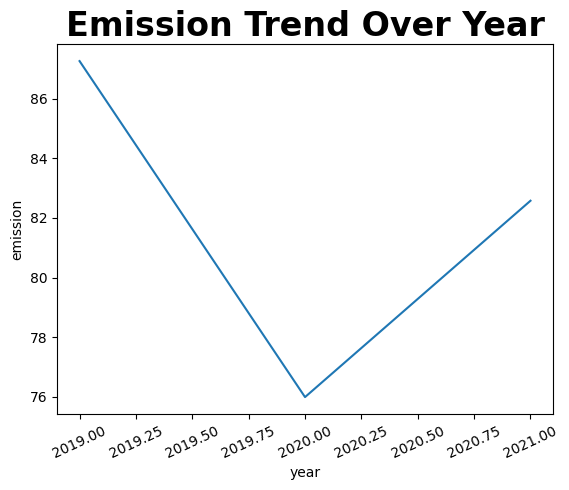

In [6]:
sns.lineplot(data = train, x = 'year', y = 'emission', errorbar = None)
    
plt.title('Emission Trend Over Year', fontsize = 24, fontweight = 'bold')
plt.xticks(rotation = 25)
plt.show()

視圖分析: 在2020年有下降趨勢，有可能是COVID-19疫情影響

接下來 分別繪製2019、2020、2021各年份的汙染趨勢圖

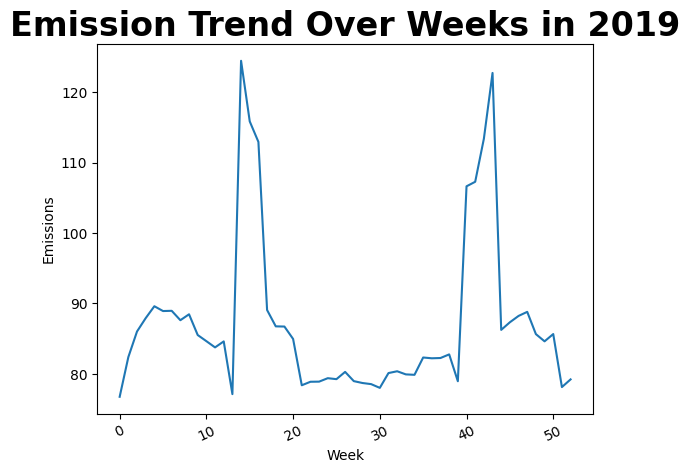

In [7]:
filtered_data_2019 = train[train['year'] == 2019]  

sns.lineplot(data=filtered_data_2019, x='week_no', y='emission', err_style=None)

plt.title('Emission Trend Over Weeks in 2019', fontsize=24, fontweight='bold')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

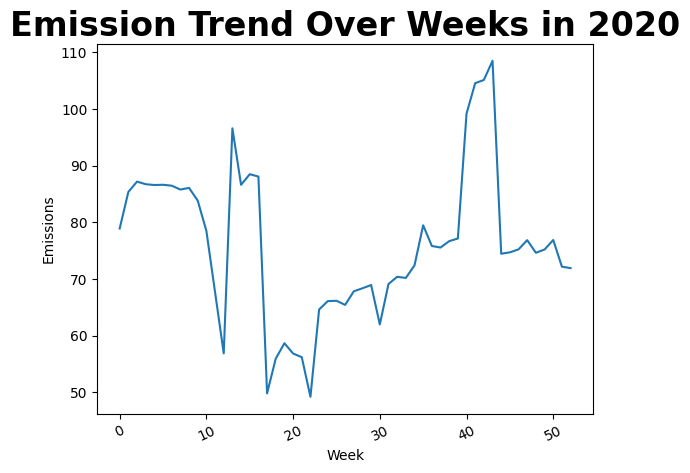

In [8]:
filtered_data_2020 = train[train['year'] == 2020]  

sns.lineplot(data=filtered_data_2020, x='week_no', y='emission', err_style=None)

plt.title('Emission Trend Over Weeks in 2020', fontsize=24, fontweight='bold')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

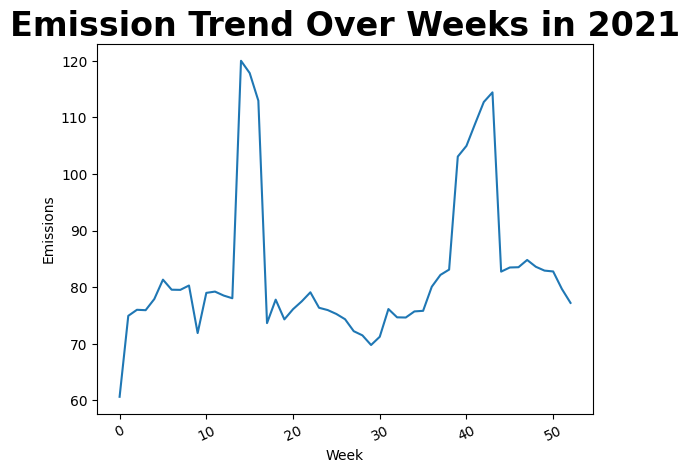

In [9]:
filtered_data_2021 = train[train['year'] == 2021]  

sns.lineplot(data=filtered_data_2021, x='week_no', y='emission', err_style=None)

plt.title('Emission Trend Over Weeks in 2021', fontsize=24, fontweight='bold')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

視圖分析:
1. Covid-19 可能造成CO2排量降低，發生在2020年的第7-8週
2. 每年第10-20周和第40-50週之間的碳排放量幾乎達該年度峰值 (冬季)

接下來繪製各年份的經緯度資料點在地圖上

In [10]:
fig = px.scatter_mapbox(data_frame=filtered_data_2019,
                     lat='latitude', lon='longitude',
                     size='emission', color='emission',
                     title='Carbon Emission Locations in 2019',
                     opacity=0.7, size_max=30)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [11]:
fig = px.scatter_mapbox(data_frame=filtered_data_2020,
                     lat='latitude', lon='longitude',
                     size='emission', color='emission',
                     title='Carbon Emission Locations in 2020',
                     opacity=0.7, size_max=30)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [12]:
fig = px.scatter_mapbox(data_frame=filtered_data_2021,
                     lat='latitude', lon='longitude',
                     size='emission', color='emission',
                     title='Carbon Emission Locations in 2021',
                     opacity=0.7, size_max=30)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

視圖分析:
<br> [-2.079, 29.321] (Kibuye)為碳排較高、汙染較嚴重區域
<br> 經調查發現該地方為發電廠(power plant)-- KivuWatt

# 檢查缺失值&填補

In [13]:
pd.set_option("display.max_rows", None)  # 顯示所有列

train.isnull().sum()

latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                    14609
SulphurDioxide_SO2_column_number_density_amf                14609
SulphurDioxide_SO2_slant_column_number_density              14609
SulphurDioxide_cloud_fraction                               14609
SulphurDioxide_sensor_azimuth_angle                         14609
SulphurDioxide_sensor_zenith_angle                          14609
SulphurDioxide_solar_azimuth_angle                          14609
SulphurDioxide_solar_zenith_angle                           14609
SulphurDioxide_SO2_column_number_density_15km               14609
CarbonMonoxide_CO_column_number_density                      2122
CarbonMonoxide_H2O_column_number_density                     2122
CarbonMono

In [14]:
test.isnull().sum()

latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                     6142
SulphurDioxide_SO2_column_number_density_amf                 6142
SulphurDioxide_SO2_slant_column_number_density               6142
SulphurDioxide_cloud_fraction                                6142
SulphurDioxide_sensor_azimuth_angle                          6142
SulphurDioxide_sensor_zenith_angle                           6142
SulphurDioxide_solar_azimuth_angle                           6142
SulphurDioxide_solar_zenith_angle                            6142
SulphurDioxide_SO2_column_number_density_15km                6142
CarbonMonoxide_CO_column_number_density                      1337
CarbonMonoxide_H2O_column_number_density                     1337
CarbonMono

In [15]:
# 定義允許的非缺失值的最小數量
threshold = 78500
# 過濾缺失值
train_filtered = train.dropna(thresh=len(train) - threshold, axis=1)
train_filtered.isnull().sum()

latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
SulphurDioxide_SO2_column_number_density                    14609
SulphurDioxide_SO2_column_number_density_amf                14609
SulphurDioxide_SO2_slant_column_number_density              14609
SulphurDioxide_cloud_fraction                               14609
SulphurDioxide_sensor_azimuth_angle                         14609
SulphurDioxide_sensor_zenith_angle                          14609
SulphurDioxide_solar_azimuth_angle                          14609
SulphurDioxide_solar_zenith_angle                           14609
SulphurDioxide_SO2_column_number_density_15km               14609
CarbonMonoxide_CO_column_number_density                      2122
CarbonMonoxide_H2O_column_number_density                     2122
CarbonMono

In [16]:
threshold = 22200
test_filtered = test.dropna(thresh=len(test) - threshold, axis=1)
print(test_filtered.isnull().sum())
print("shape: ", test_filtered.shape)

latitude                                                       0
longitude                                                      0
year                                                           0
week_no                                                        0
SulphurDioxide_SO2_column_number_density                    6142
SulphurDioxide_SO2_column_number_density_amf                6142
SulphurDioxide_SO2_slant_column_number_density              6142
SulphurDioxide_cloud_fraction                               6142
SulphurDioxide_sensor_azimuth_angle                         6142
SulphurDioxide_sensor_zenith_angle                          6142
SulphurDioxide_solar_azimuth_angle                          6142
SulphurDioxide_solar_zenith_angle                           6142
SulphurDioxide_SO2_column_number_density_15km               6142
CarbonMonoxide_CO_column_number_density                     1337
CarbonMonoxide_H2O_column_number_density                    1337
CarbonMonoxide_cloud_heig

In [17]:
# 以平均值填補缺失值

train_filtered = train_filtered.fillna(train_filtered.mean())
test_filtered = test_filtered.fillna(test_filtered.mean())

In [18]:
train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64
 7   SulphurDioxide_cloud_fraction                             79023 no

SATELLITE DATA ANALYSIS

In [19]:
# 定義子圖繪製方式以便進行後續數據比較
def plot_histogram_subplots(train_df, test_df, columns_to_plot, n_cols=2, bins=20):
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

    for i, column in enumerate(columns_to_plot):
        row = i // n_cols
        col = i % n_cols

        sns.histplot(data=train_df, x=column, ax=axes[row, col], bins=bins, color='blue', label='Train')
        sns.histplot(data=test_df, x=column, ax=axes[row, col], bins=bins, color='orange', label='Test')

        axes[row, col].set_title(column)
        axes[row, col].set_xlabel(None)
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()

針對不同汙染物進行繪圖、觀察訓練集與測試集的關係

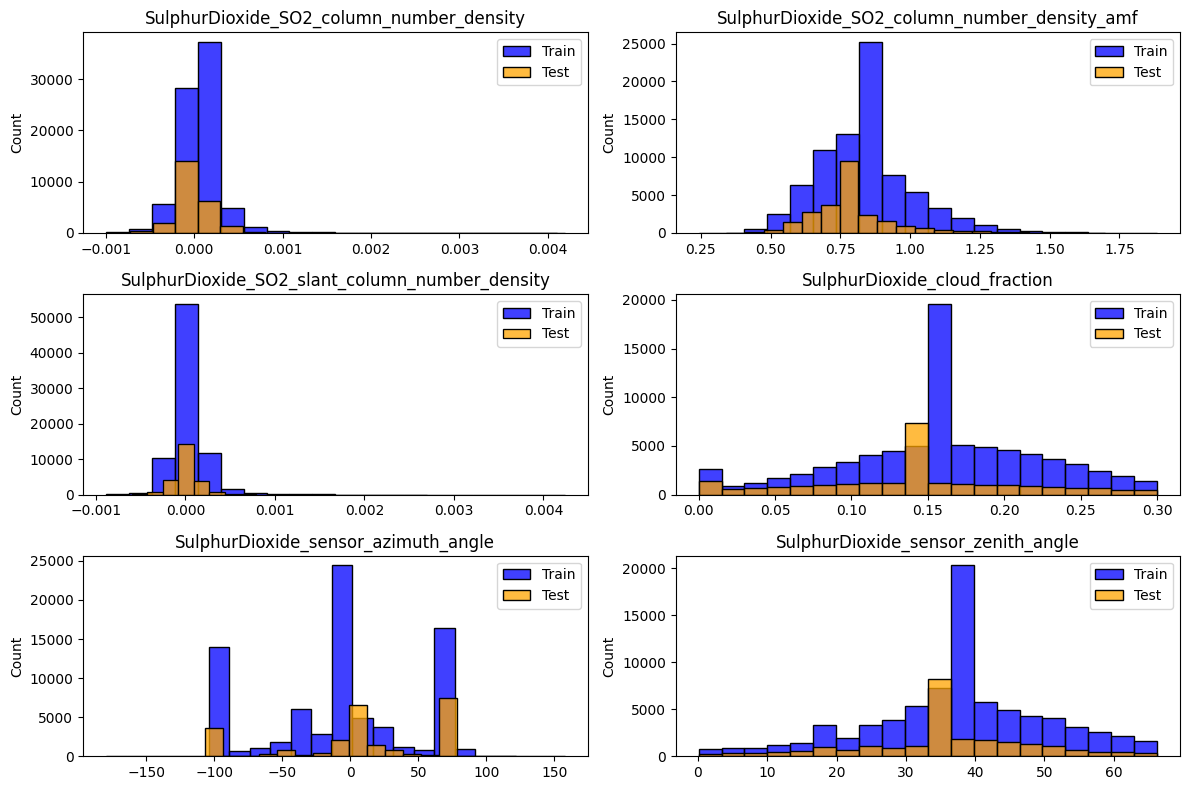

In [20]:
# 二氧化硫
columns_to_plot = [
    'SulphurDioxide_SO2_column_number_density',
    'SulphurDioxide_SO2_column_number_density_amf',
    'SulphurDioxide_SO2_slant_column_number_density',
    'SulphurDioxide_cloud_fraction',
    'SulphurDioxide_sensor_azimuth_angle',
    'SulphurDioxide_sensor_zenith_angle'
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot)

二氧化硫SO2: 根據上圖可以合理推測訓練和測試資料集中的值大致來自相同的統計分佈。

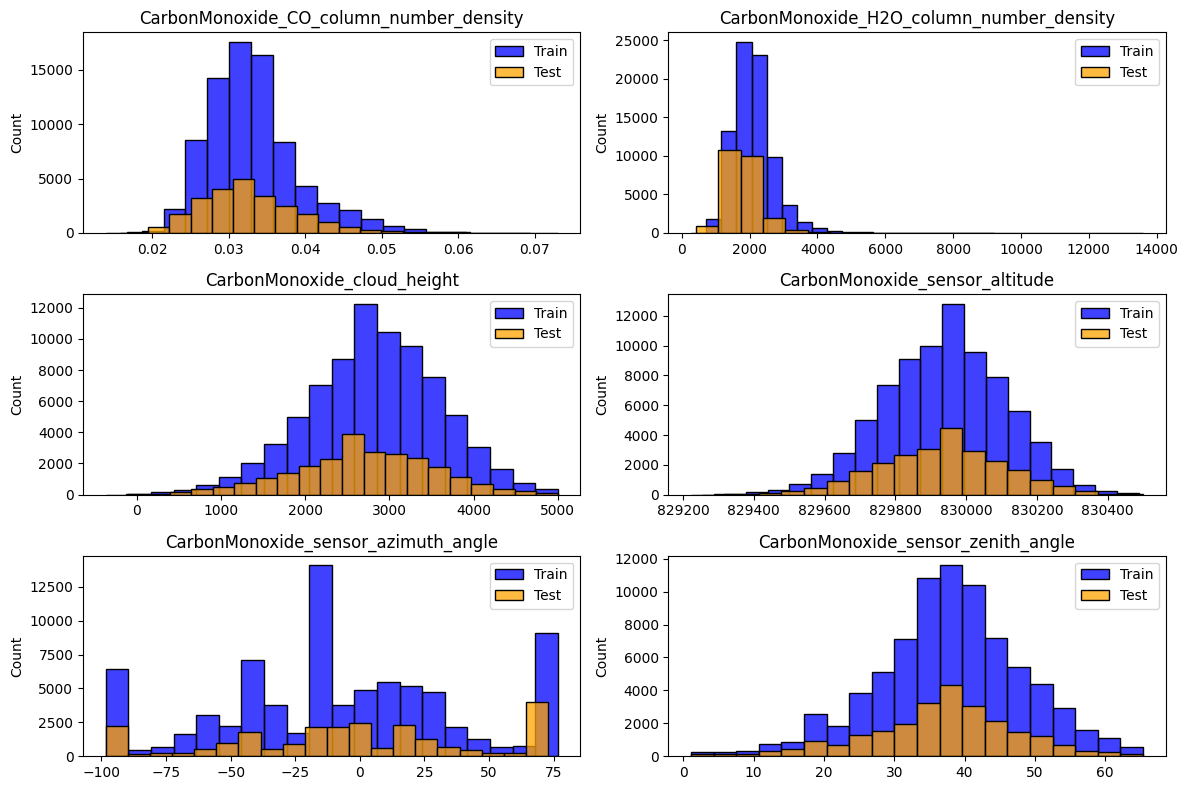

In [21]:
columns_to_plot1 = [
    'CarbonMonoxide_CO_column_number_density',
    'CarbonMonoxide_H2O_column_number_density',
    'CarbonMonoxide_cloud_height',
    'CarbonMonoxide_sensor_altitude',
    'CarbonMonoxide_sensor_azimuth_angle',
    'CarbonMonoxide_sensor_zenith_angle'
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot1)

一氧化碳CO: 根據上圖可以合理推測訓練和測試資料集中的值來自相同的統計分佈。

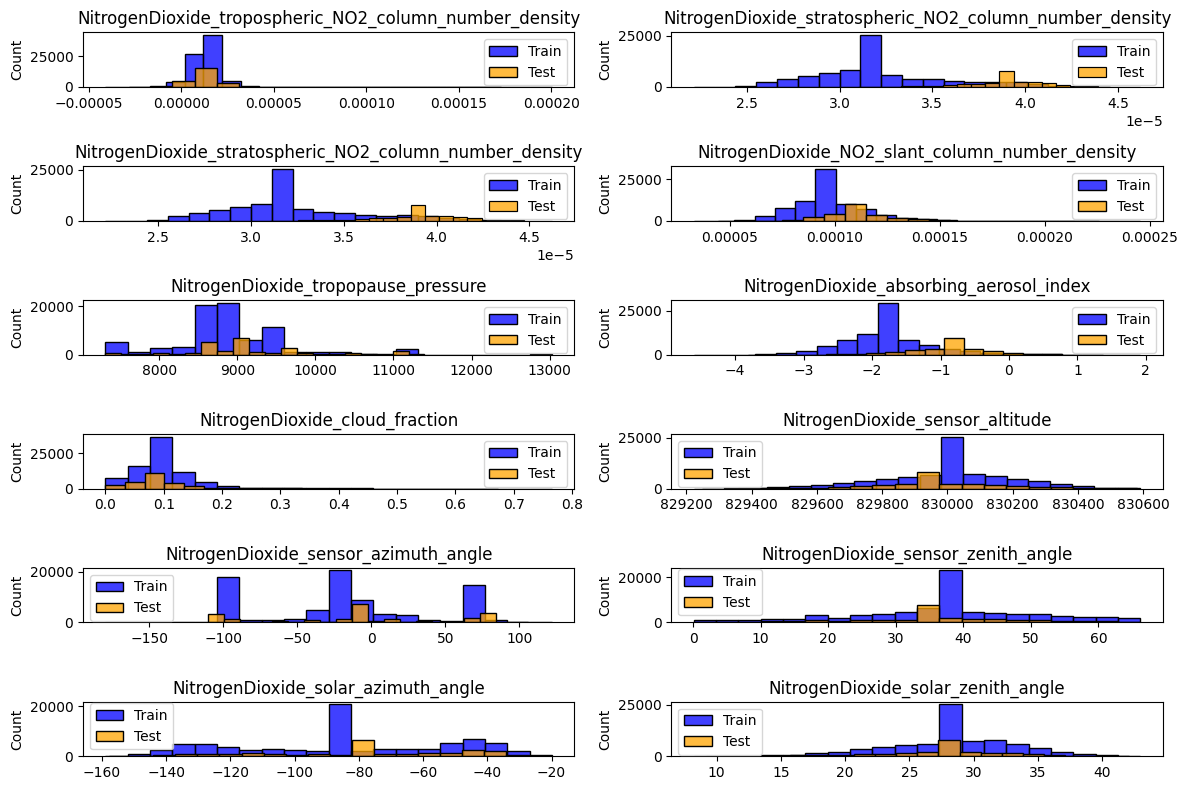

In [22]:
columns_to_plot2 = [
    'NitrogenDioxide_tropospheric_NO2_column_number_density',
    'NitrogenDioxide_stratospheric_NO2_column_number_density',
    'NitrogenDioxide_stratospheric_NO2_column_number_density',
    'NitrogenDioxide_NO2_slant_column_number_density',
    'NitrogenDioxide_tropopause_pressure',
    'NitrogenDioxide_absorbing_aerosol_index',
    'NitrogenDioxide_cloud_fraction',
    'NitrogenDioxide_sensor_altitude',
    'NitrogenDioxide_sensor_azimuth_angle',
    'NitrogenDioxide_sensor_zenith_angle',
    'NitrogenDioxide_solar_azimuth_angle',
    'NitrogenDioxide_solar_zenith_angle'    
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot2)

二氧化氮NO2: 兩個資料集大多符合常態分佈，但有些columns在其分佈特徵上有明顯變化
1. 太陽天頂角
2. 太陽方位角
以上特徵擁有偏離訓練資料分佈的突出峰值 

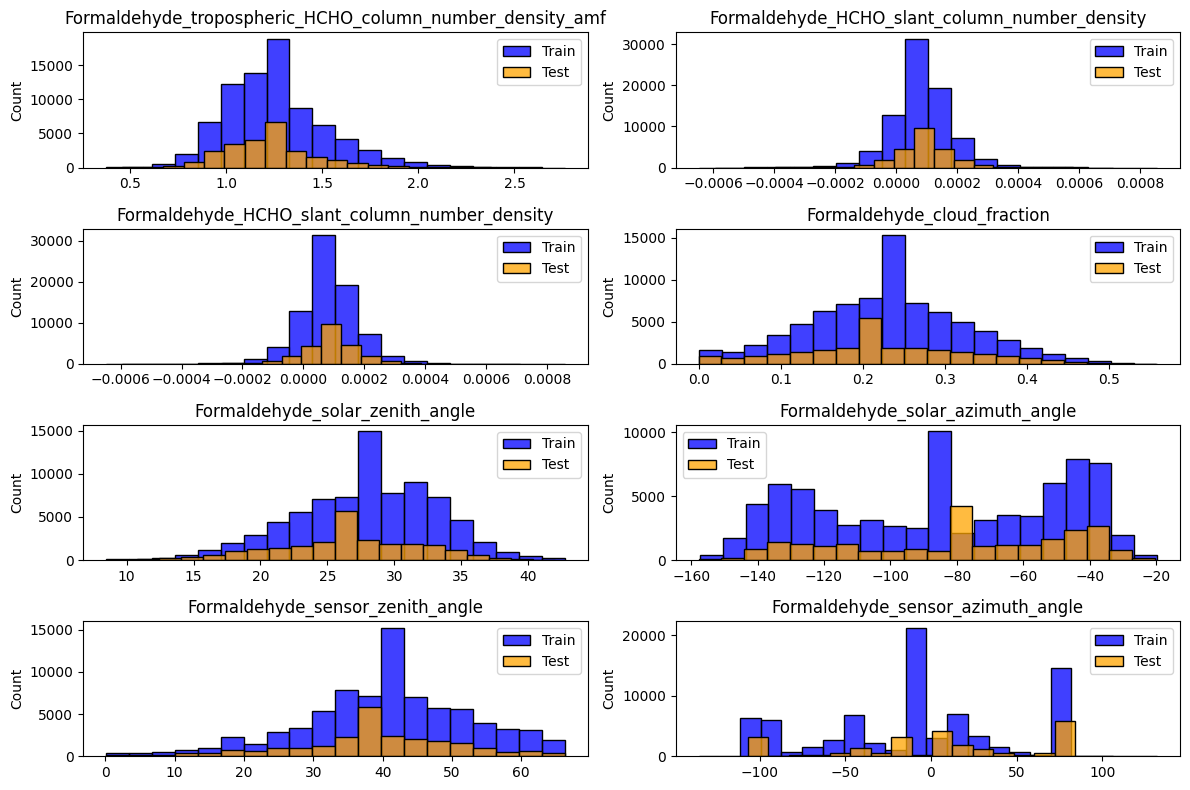

In [23]:
columns_to_plot3 = [
    'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
    'Formaldehyde_HCHO_slant_column_number_density',
    'Formaldehyde_HCHO_slant_column_number_density',
    'Formaldehyde_cloud_fraction',
    'Formaldehyde_solar_zenith_angle',
    'Formaldehyde_solar_azimuth_angle',
    'Formaldehyde_sensor_zenith_angle',
    'Formaldehyde_sensor_azimuth_angle'  
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot3)

甲醛CH2O: 兩者分布十分貼近

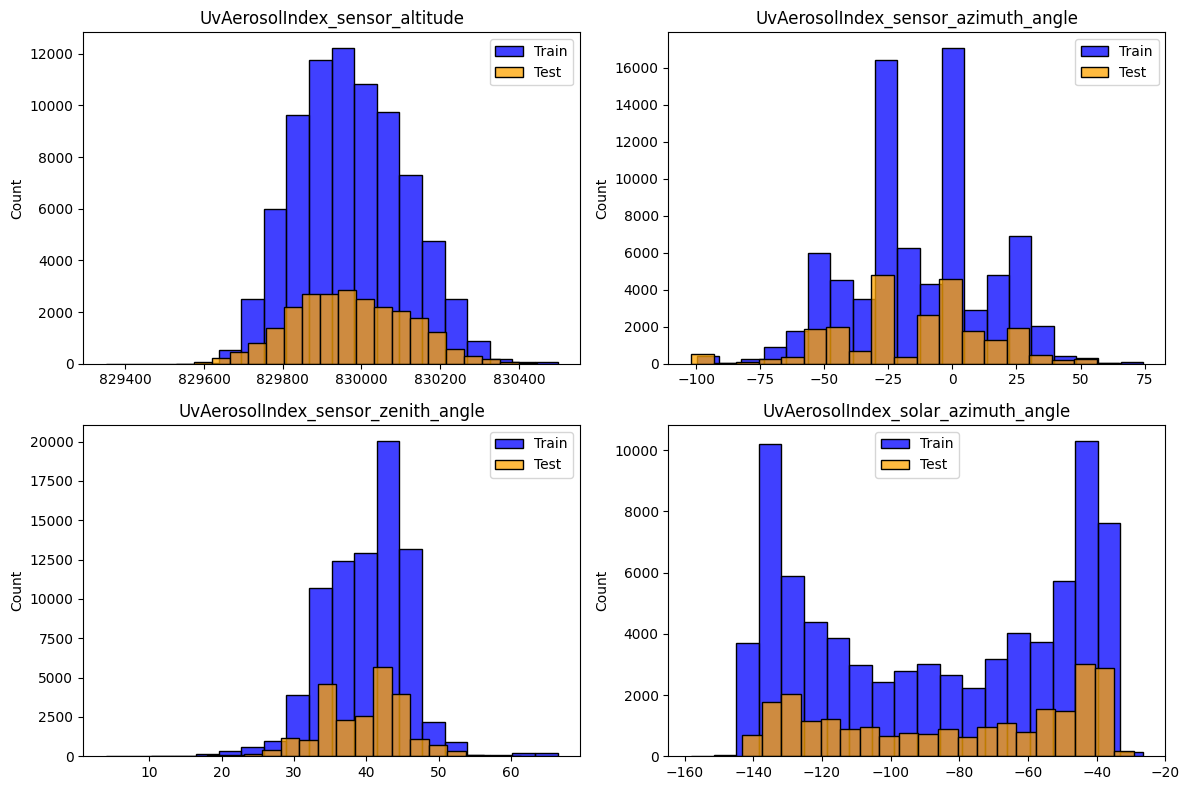

In [24]:
columns_to_plot4 = [
    'UvAerosolIndex_sensor_altitude',
    'UvAerosolIndex_sensor_azimuth_angle',
    'UvAerosolIndex_sensor_zenith_angle',
    'UvAerosolIndex_solar_azimuth_angle',  
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot4)

紫外線氣懸膠: 幾乎完美的疊加和分佈

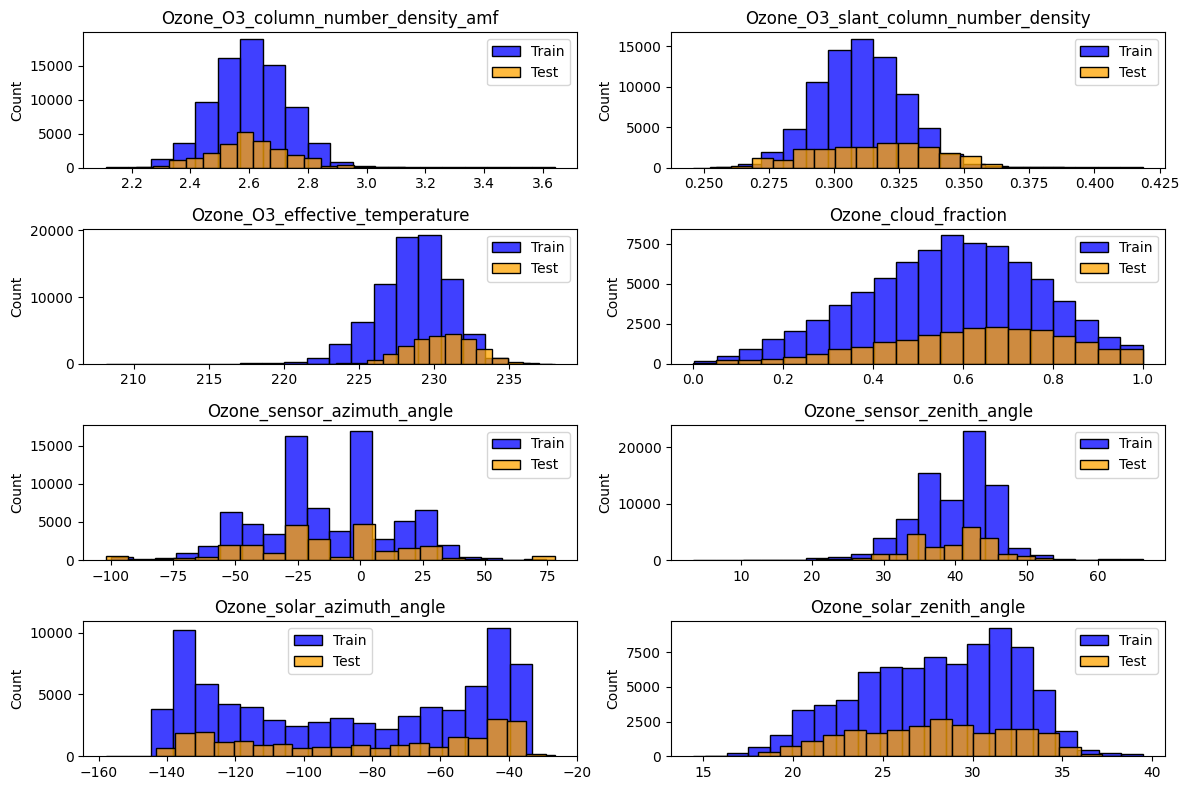

In [25]:
columns_to_plot5 = [
    'Ozone_O3_column_number_density_amf',
    'Ozone_O3_slant_column_number_density',
    'Ozone_O3_effective_temperature',
    'Ozone_cloud_fraction',
    'Ozone_sensor_azimuth_angle',
    'Ozone_sensor_zenith_angle',
    'Ozone_solar_azimuth_angle',
    'Ozone_solar_zenith_angle'
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot5)

臭氧O3: 
<br>在Ozone_O3_Effective_Temperature有輕微上升
<br>->an ozone cross section effective temperature

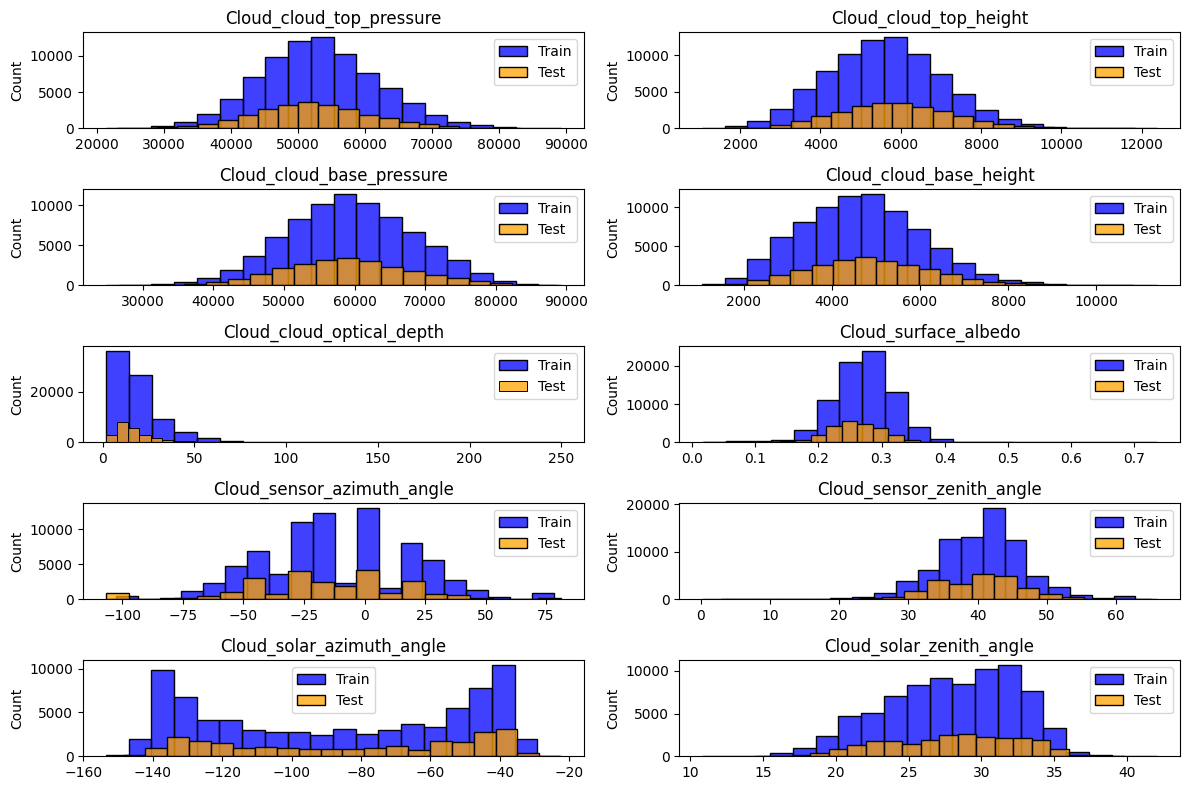

In [26]:
columns_to_plot6 = [
    'Cloud_cloud_top_pressure',
    'Cloud_cloud_top_height',
    'Cloud_cloud_base_pressure',
    'Cloud_cloud_base_height',
    'Cloud_cloud_optical_depth',
    'Cloud_surface_albedo',
    'Cloud_sensor_azimuth_angle',
    'Cloud_sensor_zenith_angle',
    'Cloud_solar_azimuth_angle',
    'Cloud_solar_zenith_angle'    
]

plot_histogram_subplots(train_filtered, test_filtered, columns_to_plot6)

Cloud: 在所有子特徵中幾乎完美重疊

# Modeling
目標: 預測2022年排放數據

1. 選擇特徵：
<br>from train data: 緯度、經度和週數

2. 由於選擇的特徵中沒有缺失值，因此不需要擔心填補缺失值的問題

3. 利用cross_val_score執行交叉驗證，評估模型在不同訓練-驗證分割上的性能
<br>cv=3 ->進行3折交叉驗證，將數據分為3個部分進行模型訓練和評估
<br>預期輸出的是一個越大越好的分數 (因為是負值)
<br>scoring='neg_mean_squared_error' -> Negative Mean Squared Error (負均方誤差)
<br>rmse_scores = np.sqrt(-scores) 用於計算均方根誤差（Root Mean Squared Error，RMSE）。
<br>最後使用迴圈遍歷每個折，打印該折的RMSE (越小越好)

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [27]:
X = train_filtered[["latitude", "longitude", "week_no"]]
y = train_filtered.emission

print("X shape",X.shape)
print("y shape",y.shape)

X shape (79023, 3)
y shape (79023,)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=242)

rmse_array = []  # 儲存其值以便繪製比較圖

1. SGDRegressor 隨機梯度下降模型

In [29]:
from sklearn.linear_model import SGDRegressor

model1 = SGDRegressor(penalty=None, alpha=0.01, max_iter=10000, random_state=42)
model1.fit(X_train, y_train)

y_test_pred = model1.predict(X_test)

scores = cross_val_score(model1, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

average_rmse = np.mean(rmse_scores)
print(f"Average RMSE_1: {average_rmse:.2f}")
rmse_array.append(average_rmse)

Fold 1 RMSE: 115.55
Fold 2 RMSE: 153.79
Fold 3 RMSE: 193.92
Average RMSE_1: 154.42


2. Gradient Boosting Regressor 梯度提升樹回歸

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor(n_estimators=100, random_state=242)
model2.fit(X_train, y_train)

y_test_pred1 = model2.predict(X_test)

scores = cross_val_score(model2, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

average_rmse = np.mean(rmse_scores)
print(f"Average RMSE_2: {average_rmse:.2f}")
rmse_array.append(average_rmse)

Fold 1 RMSE: 106.47
Fold 2 RMSE: 133.49
Fold 3 RMSE: 188.46
Average RMSE_2: 142.81


3. Random Forest Regressor 隨機森林回歸

In [31]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

y_test_pred3 = model3.predict(X_test)

scores = cross_val_score(model3, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

average_rmse = np.mean(rmse_scores)
print(f"Average RMSE_3: {average_rmse:.2f}")
rmse_array.append(average_rmse)

Fold 1 RMSE: 127.03
Fold 2 RMSE: 138.94
Fold 3 RMSE: 188.63
Average RMSE_3: 151.53


4. XGBoost 梯度提升樹

In [32]:
import xgboost as xgb

model4 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model4.fit(X_train, y_train)

y_test_pred4 = model4.predict(X_test)

scores = cross_val_score(model4, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

average_rmse = np.mean(rmse_scores)
print(f"Average RMSE_4: {average_rmse:.2f}")
rmse_array.append(average_rmse)

Fold 1 RMSE: 122.50
Fold 2 RMSE: 191.29
Fold 3 RMSE: 188.17
Average RMSE_4: 167.32


5. Light Gradient Boosting Machine 梯度提升框架回歸

In [33]:
from lightgbm import LGBMRegressor

model5 = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.4,
    min_child_samples=4,
    num_leaves=512, 
    objective="poisson",
)
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)

scores = cross_val_score(model5, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

average_rmse = np.mean(rmse_scores)
print(f"Average RMSE_5: {average_rmse:.2f}")
rmse_array.append(average_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 63218, number of used features: 3
[LightGBM] [Info] Start training from score 4.405381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 52682, number of used features: 3
[LightGBM] [Info] Start training from score 4.425318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 526

6. 參考下方Case2的模型選擇

In [34]:
from sklearn.ensemble import VotingRegressor  # 結合多個回歸模型的集成方法
from catboost import CatBoostRegressor  # 基於梯度提升樹的回歸模型
from lightgbm import LGBMRegressor  # 輕量級的梯度提升樹模型
from sklego.linear_model import LADRegression  # 具有Huber損失的線性回歸模型


params_cat6 = {'iterations': 1285, 'learning_rate': 0.05697468013225788, 'depth': 12, 'colsample_bylevel': 0.7122430260124685, 
               'l2_leaf_reg': 5.505710658290967e-06, 'bootstrap_type': 'Bayesian', 'random_strength': 0.06485456291922229, 
               'bagging_temperature': 0.9920763547972019, 'od_type': 'Iter', 'od_wait': 27, 'verbose': False}

params_lgb6 = {'iterations': 643, 'learning_rate': 0.01799337242262374, 'num_leaves': 728, 'subsample': 0.9508342062868346, 
               'colsample_bytree': 0.8872570081864659, 'min_data_in_leaf': 8}

cat = CatBoostRegressor(**params_cat6)
lgb = LGBMRegressor(**params_lgb6)
'''
hard voting --> 最終預測結果是所有模型中投票最多的類別或平均預測值
'''
er = VotingRegressor([('cat', cat), ('lgb', lgb)])

model = er
model.fit(X_train, y_train)

y_pred_s = model.predict(X_test)

# LAD Regression（L1 Regression）
# Reshape the arrays to be 2D
pred_s = y_pred_s.reshape(-1, 1)

model6 = LADRegression().fit(pred_s, y_test)  

y_pred6 = model6.predict(pred_s) 

scores = cross_val_score(model6, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

for i, rmse in enumerate(rmse_scores, start=1):
    print(f"Fold {i} RMSE: {rmse:.2f}")

average_rmse = np.mean(rmse_scores)
print(f"Average RMSE_6: {average_rmse:.2f}")
rmse_array.append(average_rmse)

[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 63218, number of used features: 3
[LightGBM] [Info] Start training from score 81.890296
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
Fold 1 RMSE: 91.09
Fold 2 RMSE: 143.07
Fold 3 RMSE: 189.22
Average RMSE_6: 141.13


# 繪製各模型比較結果

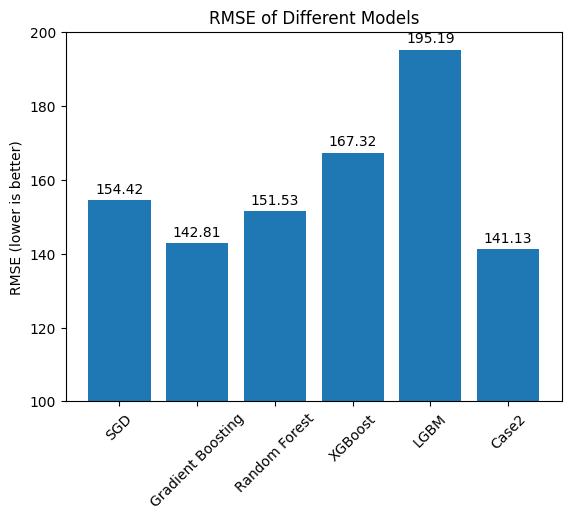

In [35]:
models = [model1, model2, model3, model4, model5, model6]
min_rmse_index = np.argmin(rmse_array)
bestmodel = models[min_rmse_index]

model_name = ['SGD', 'Gradient Boosting', 'Random Forest', 'XGBoost', 'LGBM', 'Case2']
plt.figure()
plt.bar(range(len(rmse_array)), rmse_array)
plt.ylim(100, 200)
for i, rmse in enumerate(rmse_array):
    plt.text(i, rmse + 1, f"{rmse:.2f}", ha='center', va='bottom')
plt.xticks([x for x in range(6)], model_name, rotation=45)
plt.ylabel('RMSE (lower is better)')
plt.title('RMSE of Different Models')
plt.show()

In [36]:
if min_rmse_index<=4:
    
    submission = pd.DataFrame(
      {
          "ID_LAT_LON_YEAR_WEEK": test.index,
        "emission": bestmodel.predict(test[["latitude", "longitude", "week_no"]]),
    }
    ).set_index("ID_LAT_LON_YEAR_WEEK")
else:
    submission = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': y_test.index, 'emission': y_pred6}) 
    
submission.to_csv("hw2_submission1.csv")
print("Done.")

Done.


# 未來與展望

1. 因為模型部分僅取用"沒有缺失值"的參數進行特徵抓取&訓練，也許可以利用其他氣體的排放進一步分析其相關性
2. 針對不同氣體的排放量作地域性分析 (或許可以再想想為什麼kaggle會是取用Rwanda地區的資料)
3. 發現cross_val_score隨著cv值有遞增的特性，但目前還不是很了解交叉驗證的內容

# Results
1. 資料視覺化分析
<br> 碳排與時間序列的關係: COVID-19 影響導致下降
<br> 碳排與時間年變化的關係: 冬季多為上升 ( 赤道地區的大氣狀態& 生質燃燒)
<br> 碳排與地區的關係: Kibuye有發電廠 (KivuWatt) 所以有碳排量較大的color points

2. 參賽結果(RMSE值)
<br>Case1 (以上內容)= 141.13, 大約 1303/1442名
<br>Case2 (以下內容)= 21.73, 大約 738/1442名

# Case 2  (參考資料實作&調整)
我發現以下參考資料是以2019與2021上半年作為訓練集、2021下半年作為測試集
<br>(一般train_test_split應是預測2022的結果)
<br>
<br>References: https://www.kaggle.com/code/roberttrypuz/predict-co2-emissions-in-rwanda
<br>參考：資料處理方法
<br>參考：訓練、測試集選擇
<br>參考：模型集成辦法與參數設定

In [37]:
train = pd.read_csv('./data/co2/train.csv')
test = pd.read_csv('./data/co2/test.csv')

In [38]:
# only location, weeks, year and emission
train = train[['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no', 'emission']]
test = test[['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no']]

In [39]:
# Submissions are scored on the Root Mean Squared Error (RMSE)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_array_2 = []

In [40]:
# duplicates train-test
pd.concat([train, test], axis=0).duplicated().sum()

0

In [41]:
# missing values check
train.isna().any().any(), test.isna().any().any()

# 整個訓練集中是否存在至少一個缺失值
'''
1、any()：針對每一列進行判斷 缺失值返回True
2、any()：對所有列進行判斷 缺失值返回True
'''

'\n1、any()：針對每一列進行判斷 缺失值返回True\n2、any()：對所有列進行判斷 缺失值返回True\n'

In [42]:
print(f'train.shape: {train.shape}')
print(f'test.shape: {test.shape}')

train.shape: (79023, 6)
test.shape: (24353, 5)


In [43]:
train.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  emission
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0  3.750994
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1  4.025176
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2  4.231381
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3  4.305286
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4  4.347317

In [44]:
test.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4

Pre- and postprocessing

In [45]:
# int_每個樣本所在的年份相對於 2019 年過去了多少年
train["year_int"] = train["year"] - 2019
test["year_int"] = test["year"] - 2019

In [46]:
# References: https://www.kaggle.com/mattop

# location = str(latitude_longitude)
train["location"] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]
test['location'] = [str(x) + '_' + str(y) for x, y in zip(test.latitude, test.longitude)]

In [47]:
# 編碼週期性特徵
def encode_date(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

train = encode_date(train, 'week_no', 53)
test = encode_date(test, 'week_no', 53)


In [48]:
# 編碼週期性特徵
def encode_lat_lon(df):
    df['latitude_sin'] = np.sin(np.radians(df['latitude']))
    df['latitude_cos'] = np.cos(np.radians(df['latitude']))
    df['longitude_sin'] = np.sin(np.radians(df['longitude']))
    df['longitude_cos'] = np.cos(np.radians(df['longitude']))
    return df
    
train = encode_lat_lon(train)
test = encode_lat_lon(test)  

In [49]:
# 對模型的預測結果進行後處理
def postprocessing(sub_preds, 
                   grow_factor=1.065, 
                   max_factor=0.992):
    
    ''' # 決定不使用，因為 train.shape != test.shape
    # 1. mean of the past
    
    使用過去幾年的平均值來調整預測結果。
    使用2021年以前的數據（year 2019至2021），並且只考慮週數小於49的數據。
    調整係數是 max_factor 的值，乘以過去數年的最大排放值。  
    
    # References: https://www.kaggle.com/code/kdmitrie/pgs320-the-shortest-solution-lb-22-97
    # https://www.kaggle.com/code/yakubsadlil/7-lines-code-higher-score
    
    predictions_2022 = max_factor * np.max([train[(train.year == y) & 
                                                  (train.week_no < 49)].emission 
                                       for y in range(2019, 2022)], axis=0)
    sub_preds = np.mean(np.stack([predictions_2022, sub_preds]), axis=0)     
    '''

    # 2. get rid of negative emissions
    '''
    將預測結果中的負值設置為零，因為排放量不能為負數。
    '''
    sub_preds[sub_preds < 0] = 0  
    
    # 3. grow factor
    '''
    將預測結果乘以一個生長係數 grow_factor，以進一步調整預測值。
    '''
    # References: https://www.kaggle.com/competitions/playground-series-s3e20/discussion/428791
     
    sub_preds = sub_preds * grow_factor
    
    # 4. fixing longitude = 29.321
    '''
    修復經度為29.321的地點的預測結果。
    使用過去數年中相同經度的數據（2021年，週數小於等於48）來替換測試數據中的相應預測值。
    '''
    # References: https://www.kaggle.com/competitions/playground-series-s3e20/discussion/429717
    fix_indexes = test[test['longitude']==29.321].index
    fixing_values = train.loc[(train['year']==2021) &
                                  (train['week_no']<=48) &
                                  (train['longitude']==29.321),
                                  'emission'].values
    fix_indexes_int = [test.index.get_loc(idx) for idx in fix_indexes]
    sub_preds[fix_indexes_int] = fixing_values
    
    # 5. 15 locations have zero CO2 emissions; all 15 are present in the test set
    '''
    在15個地點中排放量為零、這15個地點都存在於測試集中。
    將這15個地點的預測結果設置為零。
    '''
    # References: https://www.kaggle.com/competitions/playground-series-s3e20/discussion/428566
    zero_emission_locations = train.groupby('location')['emission'].mean().sort_values().iloc[:15].index
    zero_emission_locations_test_idx = test[test['location'].isin(zero_emission_locations)].index
    
    zero_emission_locations_test_idx_int = [np.where(sub_preds == idx)[0] for idx in zero_emission_locations_test_idx]
    zero_emission_locations_test_idx_int = [item for sublist in zero_emission_locations_test_idx_int for item in sublist]
    sub_preds[zero_emission_locations_test_idx_int] = 0

    
    return sub_preds

# Model

1. 訓練集、測式集選擇

In [50]:
# 選擇2019年全年和2021年第一、第二季度（25週以內）的數據
# 作為訓練集
rows_2019_2021_q_1_2 = list(train[(train['year']==2019) | 
                                  ((train['year']==2021) & (train['week_no']<=25))
                                 ].index)

# 選擇2021年第三、第四季度（26週及以後）的數據
# 作為測試集
rows_2021_q_3_4 = list(train[(train['year']==2021) & (train['week_no']>=26)].index)

columns = ['year_int', 'latitude_sin', 'longitude_sin', 'latitude_cos', 'longitude_cos', 'week_no_sin', 'week_no_cos']

X = train[columns]
y = train.emission

X_train = X.iloc[rows_2019_2021_q_1_2]
y_train = y[rows_2019_2021_q_1_2]
X_val = X.iloc[rows_2021_q_3_4]
y_val = y[rows_2021_q_3_4]

print(f'X_train shape: {X_train.shape}, X_val shape: {X_val.shape}')

X_train shape: (39263, 7), X_val shape: (13419, 7)


2. 使用VotingRegressor 投票回歸器
<br>進行模型集成: (CatBoostRegressor,LGBMRegressor)
<br>最後使用LADRegression進行進一步的預測調整
<br>
<br>VotingRegressor  # 結合多個回歸模型的集成方法
<br>CatBoostRegressor  # 基於梯度提升樹的回歸模型
<br>LGBMRegressor  # 輕量級的梯度提升樹模型
<br>LADRegression  # 具有Huber損失的線性回歸模型


In [51]:
from sklearn.ensemble import VotingRegressor  # 結合多個回歸模型的集成方法
from catboost import CatBoostRegressor  # 基於梯度提升樹的回歸模型
from lightgbm import LGBMRegressor  # 輕量級的梯度提升樹模型
from sklego.linear_model import LADRegression  # 具有Huber損失的線性回歸模型


params_cat6 = {'iterations': 1285, 'learning_rate': 0.05697468013225788, 'depth': 12, 'colsample_bylevel': 0.7122430260124685, 
               'l2_leaf_reg': 5.505710658290967e-06, 'bootstrap_type': 'Bayesian', 'random_strength': 0.06485456291922229, 
               'bagging_temperature': 0.9920763547972019, 'od_type': 'Iter', 'od_wait': 27, 'verbose': False}

params_lgb6 = {'iterations': 643, 'learning_rate': 0.01799337242262374, 'num_leaves': 728, 'subsample': 0.9508342062868346, 
               'colsample_bytree': 0.8872570081864659, 'min_data_in_leaf': 8}

cat = CatBoostRegressor(**params_cat6)
lgb = LGBMRegressor(**params_lgb6)
'''
hard voting --> 最終預測結果是所有模型中投票最多的類別或平均預測值
'''
er = VotingRegressor([('cat', cat), ('lgb', lgb)])

# train model
model = er
model.fit(X_train, y_train)

# 測試集預測
val_preds = model.predict(X_val)
# 計算預測結果的均方根誤差
rmse_val = rmse(y_val, val_preds)
print(f"RMSE_VAL:", rmse_val)
rmse_array_2.append(rmse_val)


# 取全部資料進行2022年的預測
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=242)
# 測試集預測
preds_test_sub = model.predict(X_test)

# LAD Regression（L1 Regression）
# Reshape the arrays to be 2D
preds = val_preds.reshape(-1, 1)
preds_test_sub = preds_test_sub.reshape(-1, 1)

# 擬合驗證集預測結果和實際目標
lad = LADRegression().fit(preds, y_val)  

# 測試集預測
lad_pred = lad.predict(preds_test_sub)

# 計算預測結果的均方根誤差
rmse_lad = rmse(y_test, lad_pred)
print(f"RMSE_LAD:", rmse_lad)
rmse_array_2.append(rmse_lad)

[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1120
[LightGBM] [Info] Number of data points in the train set: 39263, number of used features: 7
[LightGBM] [Info] Start training from score 85.245453
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
RMSE_VAL: 24.12345583631016
[LightGBM] [Warning] Unknown parameter: iterations
[L

3. 進行後處理與輸出

In [52]:
postprocessed_preds = postprocessing(lad_pred)

# 計算後處理結果的均方根誤差
rmse_post = rmse(y_test, postprocessed_preds)
print(f"RMSE_POST:", rmse_post)
rmse_array_2.append(rmse_post)

RMSE_POST: 83.68301805875747


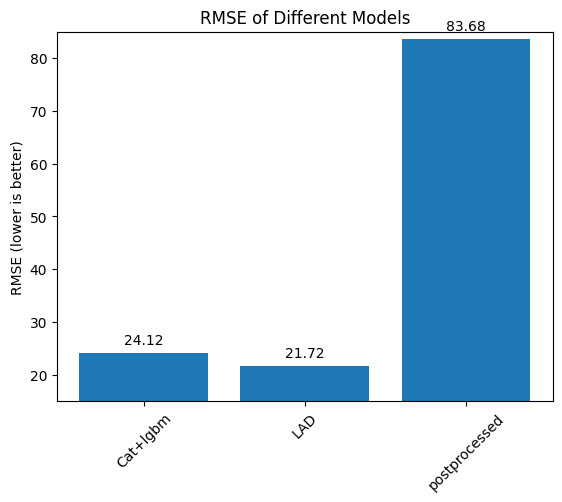

Done.


In [53]:
pred_name = [rmse_val, rmse_lad, rmse_post]
min_rmse = np.argmin(rmse_array_2)
best = pred_name[min_rmse]

model_2_name = ['Cat+lgbm', 'LAD', 'postprocessed']
plt.figure()
plt.bar(range(len(rmse_array_2)), rmse_array_2)
plt.ylim(15, 85)
for i, rmse in enumerate(rmse_array_2):
    plt.text(i, rmse + 1, f"{rmse:.2f}", ha='center', va='bottom')
plt.xticks([x for x in range(3)], model_2_name, rotation=45)
plt.ylabel('RMSE (lower is better)')
plt.title('RMSE of Different Models')
plt.show()

# 輸出預測結果
output = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': X_test.index, 'emission': best})   
output.to_csv('hw2_submission2.csv', index=False)
print("Done.")